# Iris Flower Classification


In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Collecting the data

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Iris.csv') # Using pandas, the dataset is fitted into a dataframe

In [4]:
dataset.keys()

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

- **Features**: SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm

- **Target**: Species

## Analyzing the data

In [5]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- Dataset consists of 150 samples of Iris flower.

In [6]:
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

- There are no Null values in the dataset. Hence the dataset is clean.

<Axes: xlabel='count', ylabel='Species'>

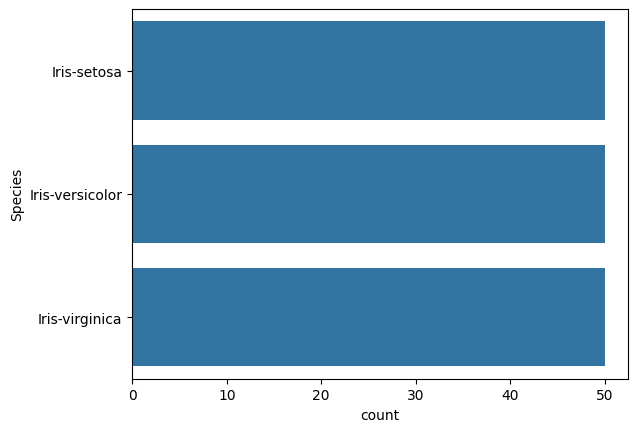

In [7]:
sns.countplot(dataset['Species'])

In [8]:
dataset['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

- There are **3** different types of flowers, each type has 50 samples.

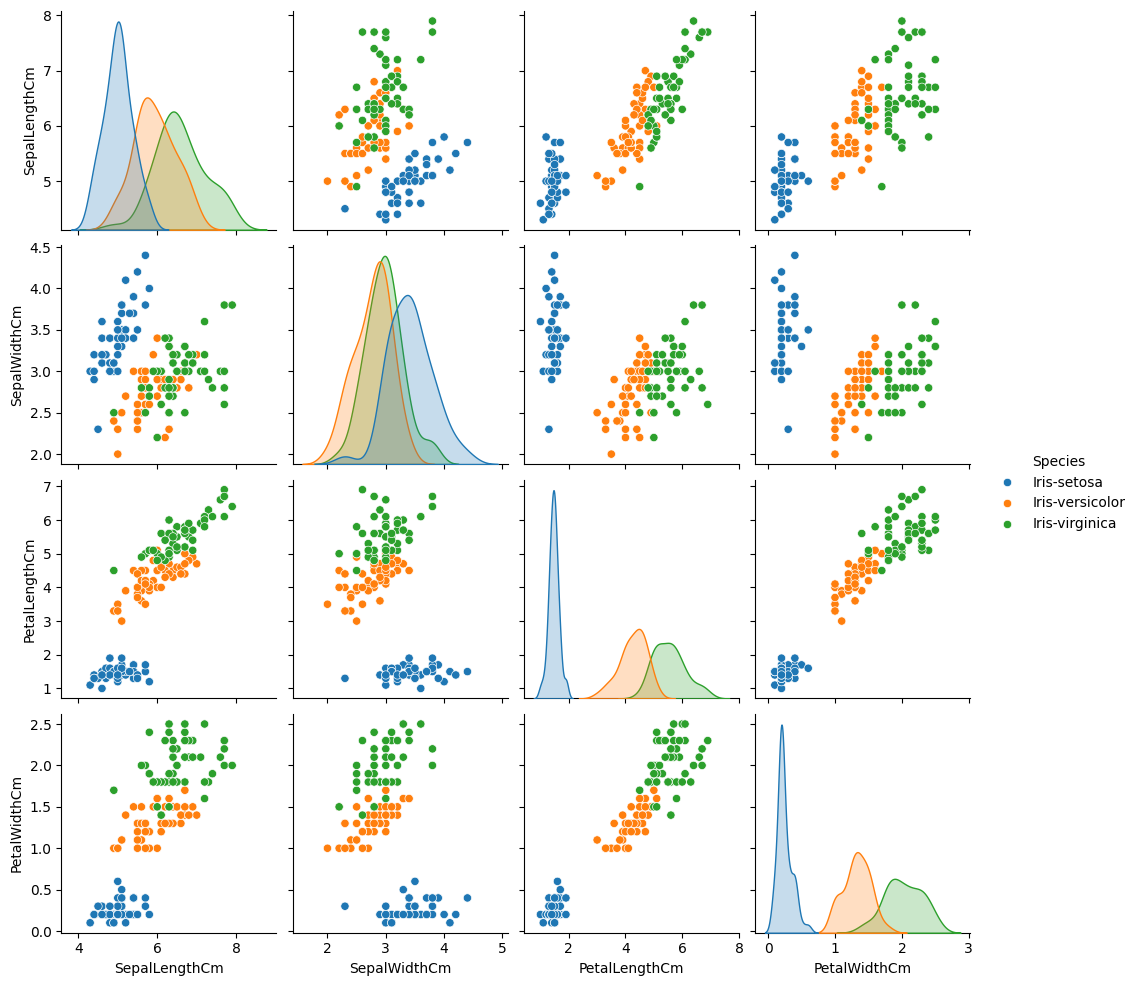

In [9]:
sns.pairplot(dataset,hue='Species')

- By observing the above plots, we can say that Classifiers models will be useful for prediction, since the datapoints corresponding to a type are located at same region.

## Preprocessing the Dataset

- Label Encoding is used to convert the categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data.

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset['Species'] = encoder.fit_transform(dataset['Species'])
dataset['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

## Correlation Matrix

- It determines the relationship between the features. Correlation coefficients measure how strong, and in which direction two variables are linked in a straight line.

In [12]:
dataset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

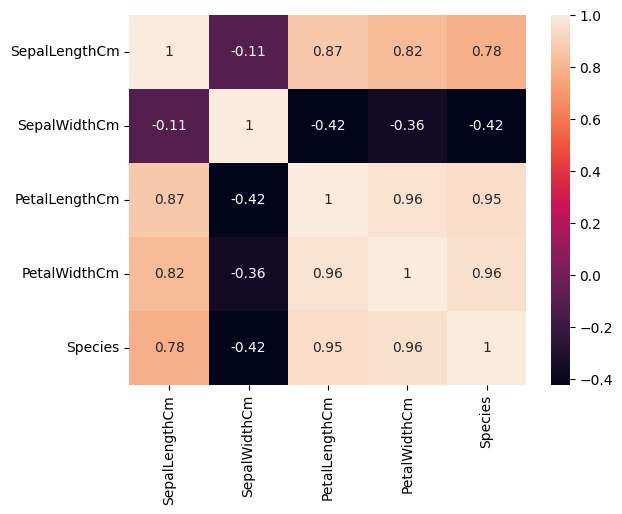

In [13]:
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='rocket')

## Training and Testing the models

- Splitting the data into the ratio 8:2, where 80% of the data is used for training the model, 20% is used for testing the model.

In [14]:
from sklearn.model_selection import train_test_split
X = dataset[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = dataset['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) # Splits the data in the ratio 8:2

In [15]:
samples = list(range(len(X_test)))

In [16]:
from sklearn.metrics import confusion_matrix

### Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train,y_train)
print("Accuracy for Linear Regression model : ",model1.score(X_test,y_test)*100)

Accuracy for Linear Regression model :  91.97751650399188


**Plot of Predicted and Expected Values**

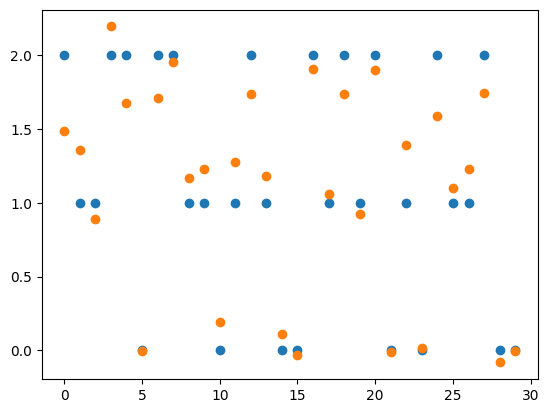

In [18]:
y1_pred = model1.predict(X_test)
plt.scatter(samples,y_test)
plt.scatter(samples,y1_pred)
plt.show()
# Blue Colored : Expected Values
# Orange Colored : Predicted Values

- Linear Regression is not used for classification since it handles with continuous data. Hence not used for classification. Therefore the classification models such as **Logistic Regression, Decision Tree Classifier, K-Neighbor Classifier, Gaussina NB** can be used.

### Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X_train,y_train)
print("Accuracy for Logistic Regression model : ",model2.score(X_test,y_test)*100)

Accuracy for Logistic Regression model :  100.0


**Plot of Predicted and Expected Values**

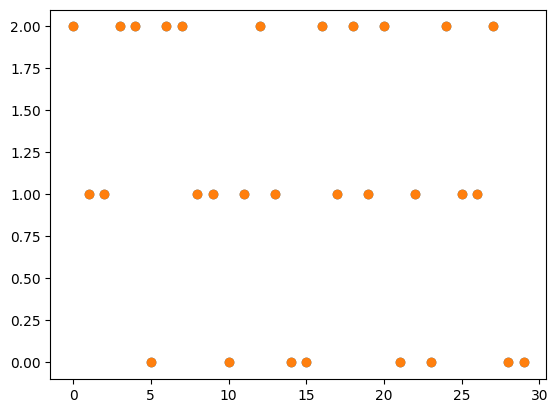

In [20]:
y2_pred = model2.predict(X_test)
plt.scatter(samples,y_test)
plt.scatter(samples,y2_pred)
plt.show()
# Blue Colored : Expected Values
# Orange Colored : Predicted Values

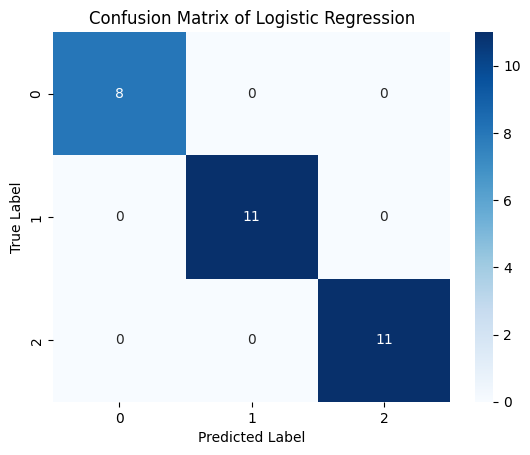

In [21]:
cm2 = confusion_matrix(y_test,y2_pred)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

- It classifies all the test samples perfectly!



### Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(X_train,y_train)
print("Accuracy for Decision Tree Classifier model : ",model3.score(X_test,y_test)*100)

Accuracy for Decision Tree Classifier model :  100.0


**Plot of Predicted and Expected Values**

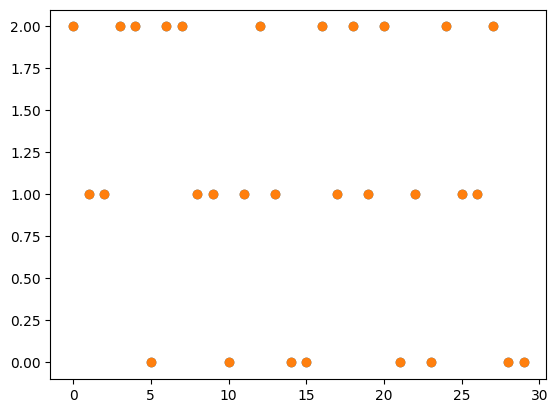

In [23]:
y3_pred = model3.predict(X_test)
plt.scatter(samples,y_test)
plt.scatter(samples,y3_pred)
plt.show()
# Blue Colored : Expected Values
# Orange Colored : Predicted Values

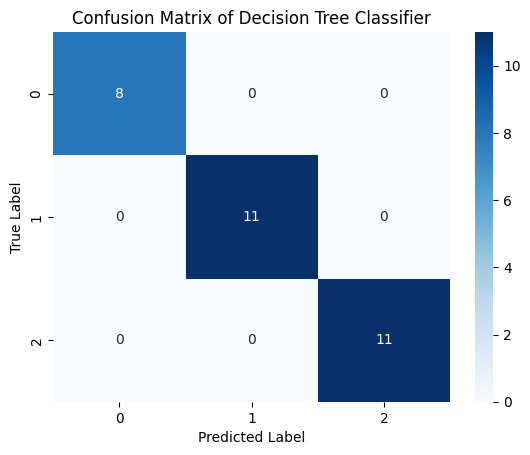

In [24]:
cm3 = confusion_matrix(y_test,y3_pred)
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Decision Tree Classifier')
plt.show()

- It classifies all the test samples perfectly!

### K-Neighbors Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier()
model4.fit(X_train,y_train)
print("Accuracy for KNN model : ",model4.score(X_test,y_test)*100)

Accuracy for KNN model :  100.0


**Plot of Predicted and Expected Values**

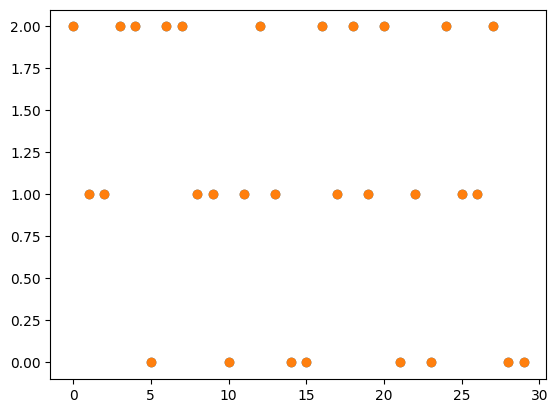

In [26]:
y4_pred = model4.predict(X_test)
plt.scatter(samples,y_test)
plt.scatter(samples,y4_pred)
plt.show()
# Blue Colored : Expected Values
# Orange Colored : Predicted Values

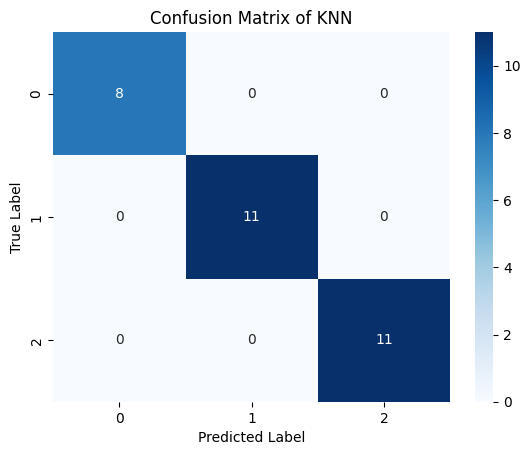

In [27]:
cm4 = confusion_matrix(y_test,y4_pred)
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of KNN')
plt.show()

- It classifies all the test samples perfectly!

### Gaussian NB

In [28]:
from sklearn.naive_bayes import GaussianNB
model5 = GaussianNB()
model5.fit(X_train,y_train)
print("Accuracy for Gaussian NB model : ",model5.score(X_test,y_test)*100)

Accuracy for Gaussian NB model :  96.66666666666667


**Plot of Predicted and Expected Values**

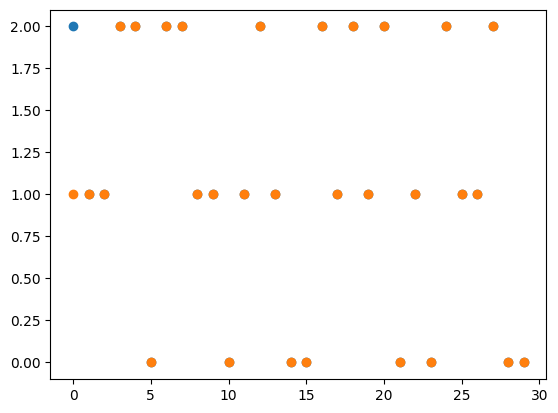

In [29]:
y5_pred = model5.predict(X_test)
plt.scatter(samples,y_test)
plt.scatter(samples,y5_pred)
plt.show()
# Blue Colored : Expected Values
# Orange Colored : Predicted Values

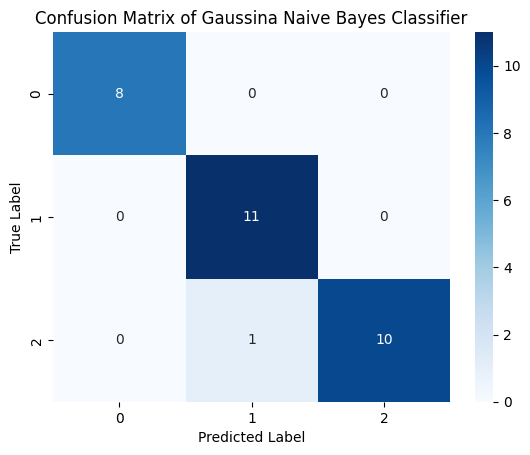

In [30]:
cm5 = confusion_matrix(y_test,y5_pred)
sns.heatmap(cm5, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Gaussian Naive Bayes Classifier')
plt.show()

- 29 out of 30 samples were classified perfectly!